In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
print(f"{words[:5]}")
print(f"Total {len(words)} words")
print(f"Smallest word length: {min(len(w) for w in words)}")
print(f"Largest word length: {max(len(w) for w in words)}")

['emma', 'olivia', 'ava', 'isabella', 'sophia']
Total 32033 words
Smallest word length: 2
Largest word length: 15


In [5]:
t = {}
for w in words:
    print(w)
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        #print(f"{ch1} {ch2} {ch3}")
        trigram = (ch1,ch2,ch3)
        t[trigram] = t.get(trigram, 0) + 1 #If trigram does not exist t.get(trigram, 0) returns a 0. 

emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
victoria
madison
luna
grace
chloe
penelope
layla
riley
zoey
nora
lily
eleanor
hannah
lillian
addison
aubrey
ellie
stella
natalie
zoe
leah
hazel
violet
aurora
savannah
audrey
brooklyn
bella
claire
skylar
lucy
paisley
everly
anna
caroline
nova
genesis
emilia
kennedy
samantha
maya
willow
kinsley
naomi
aaliyah
elena
sarah
ariana
allison
gabriella
alice
madelyn
cora
ruby
eva
serenity
autumn
adeline
hailey
gianna
valentina
isla
eliana
quinn
nevaeh
ivy
sadie
piper
lydia
alexa
josephine
emery
julia
delilah
arianna
vivian
kaylee
sophie
brielle
madeline
peyton
rylee
clara
hadley
melanie
mackenzie
reagan
adalynn
liliana
aubree
jade
katherine
isabelle
natalia
raelynn
maria
athena
ximena
arya
leilani
taylor
faith
rose
kylie
alexandra
mary
margaret
lyla
ashley
amaya
eliza
brianna
bailey
andrea
khloe
jasmine
melody
iris
isabel
norah
annabelle
valeria
emerson
adalyn
ryl

In [6]:
sorted(t.items(), key = lambda kv: -kv[1])

[(('a', 'h', '<E>'), 1714),
 (('n', 'a', '<E>'), 1673),
 (('a', 'n', '<E>'), 1509),
 (('o', 'n', '<E>'), 1503),
 (('<S>', 'm', 'a'), 1453),
 (('<S>', 'j', 'a'), 1255),
 (('<S>', 'k', 'a'), 1254),
 (('e', 'n', '<E>'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '<E>'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '<E>'), 903),
 (('i', 'e', '<E>'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '<E>'), 766),
 (('e', 'l', '<E>'), 727),
 (('y', 'a', '<E>'), 716),
 (('a', 'n', 'i'), 703),
 (('<S>', 'd', 'a'), 700),
 (('l', 'a', '<E>'), 684),
 (('e', 'r', '<E>'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('<S>', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('<S>', 'a', 'l'), 632),
 (('<S>', 'c', 'a'), 628),
 (('r', 'a', '<E>'), 627),
 (('n', 'i', '<E>'), 625),
 (('<S>', 'a', 'n'), 623),
 (('n', 'n', '<E>'), 619),
 (('n', 'e', '<E>'), 607),
 (('e', 'e', '<E>'), 605),
 (('e', 'y', '<

In [36]:
unique_chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(unique_chars)}
itos = {i+1: s for i,s in enumerate(unique_chars)}
itos[0] = '.'
stoi['.'] = 0


In [27]:
import torch
N = torch.zeros([27,27, 27], dtype = torch.int32)

for w in words:
    print(w)
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        #print(f"{ch1} {ch2} {ch3}")
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]

        N[ix1][ix2][ix3] +=1 


emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
victoria
madison
luna
grace
chloe
penelope
layla
riley
zoey
nora
lily
eleanor
hannah
lillian
addison
aubrey
ellie
stella
natalie
zoe
leah
hazel
violet
aurora
savannah
audrey
brooklyn
bella
claire
skylar
lucy
paisley
everly
anna
caroline
nova
genesis
emilia
kennedy
samantha
maya
willow
kinsley
naomi
aaliyah
elena
sarah
ariana
allison
gabriella
alice
madelyn
cora
ruby
eva
serenity
autumn
adeline
hailey
gianna
valentina
isla
eliana
quinn
nevaeh
ivy
sadie
piper
lydia
alexa
josephine
emery
julia
delilah
arianna
vivian
kaylee
sophie
brielle
madeline
peyton
rylee
clara
hadley
melanie
mackenzie
reagan
adalynn
liliana
aubree
jade
katherine
isabelle
natalia
raelynn
maria
athena
ximena
arya
leilani
taylor
faith
rose
kylie
alexandra
mary
margaret
lyla
ashley
amaya
eliza
brianna
bailey
andrea
khloe
jasmine
melody
iris
isabel
norah
annabelle
valeria
emerson
adalyn
ryl

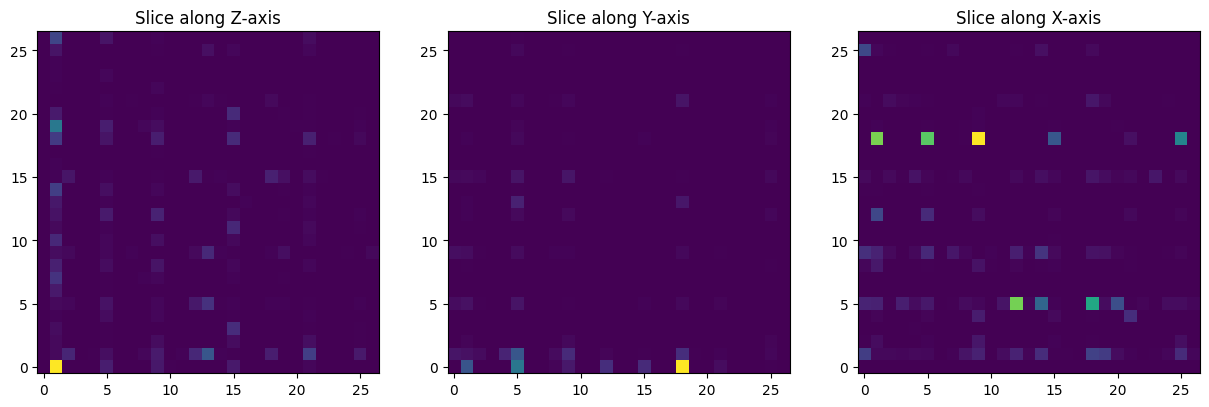

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a random 3D tensor
tensor_3d = np.random.rand(5, 5, 5)

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

# Visualize slices along different axes
axs[0].imshow(N[:, :, 2], cmap='viridis', interpolation='none', origin='lower')
axs[0].set_title('Slice along Z-axis')

axs[1].imshow(N[:, 2, :], cmap='viridis', interpolation='none', origin='lower')
axs[1].set_title('Slice along Y-axis')

axs[2].imshow(N[2, :, :], cmap='viridis', interpolation='none', origin='lower')
axs[2].set_title('Slice along X-axis')

# Show the plot
plt.show()


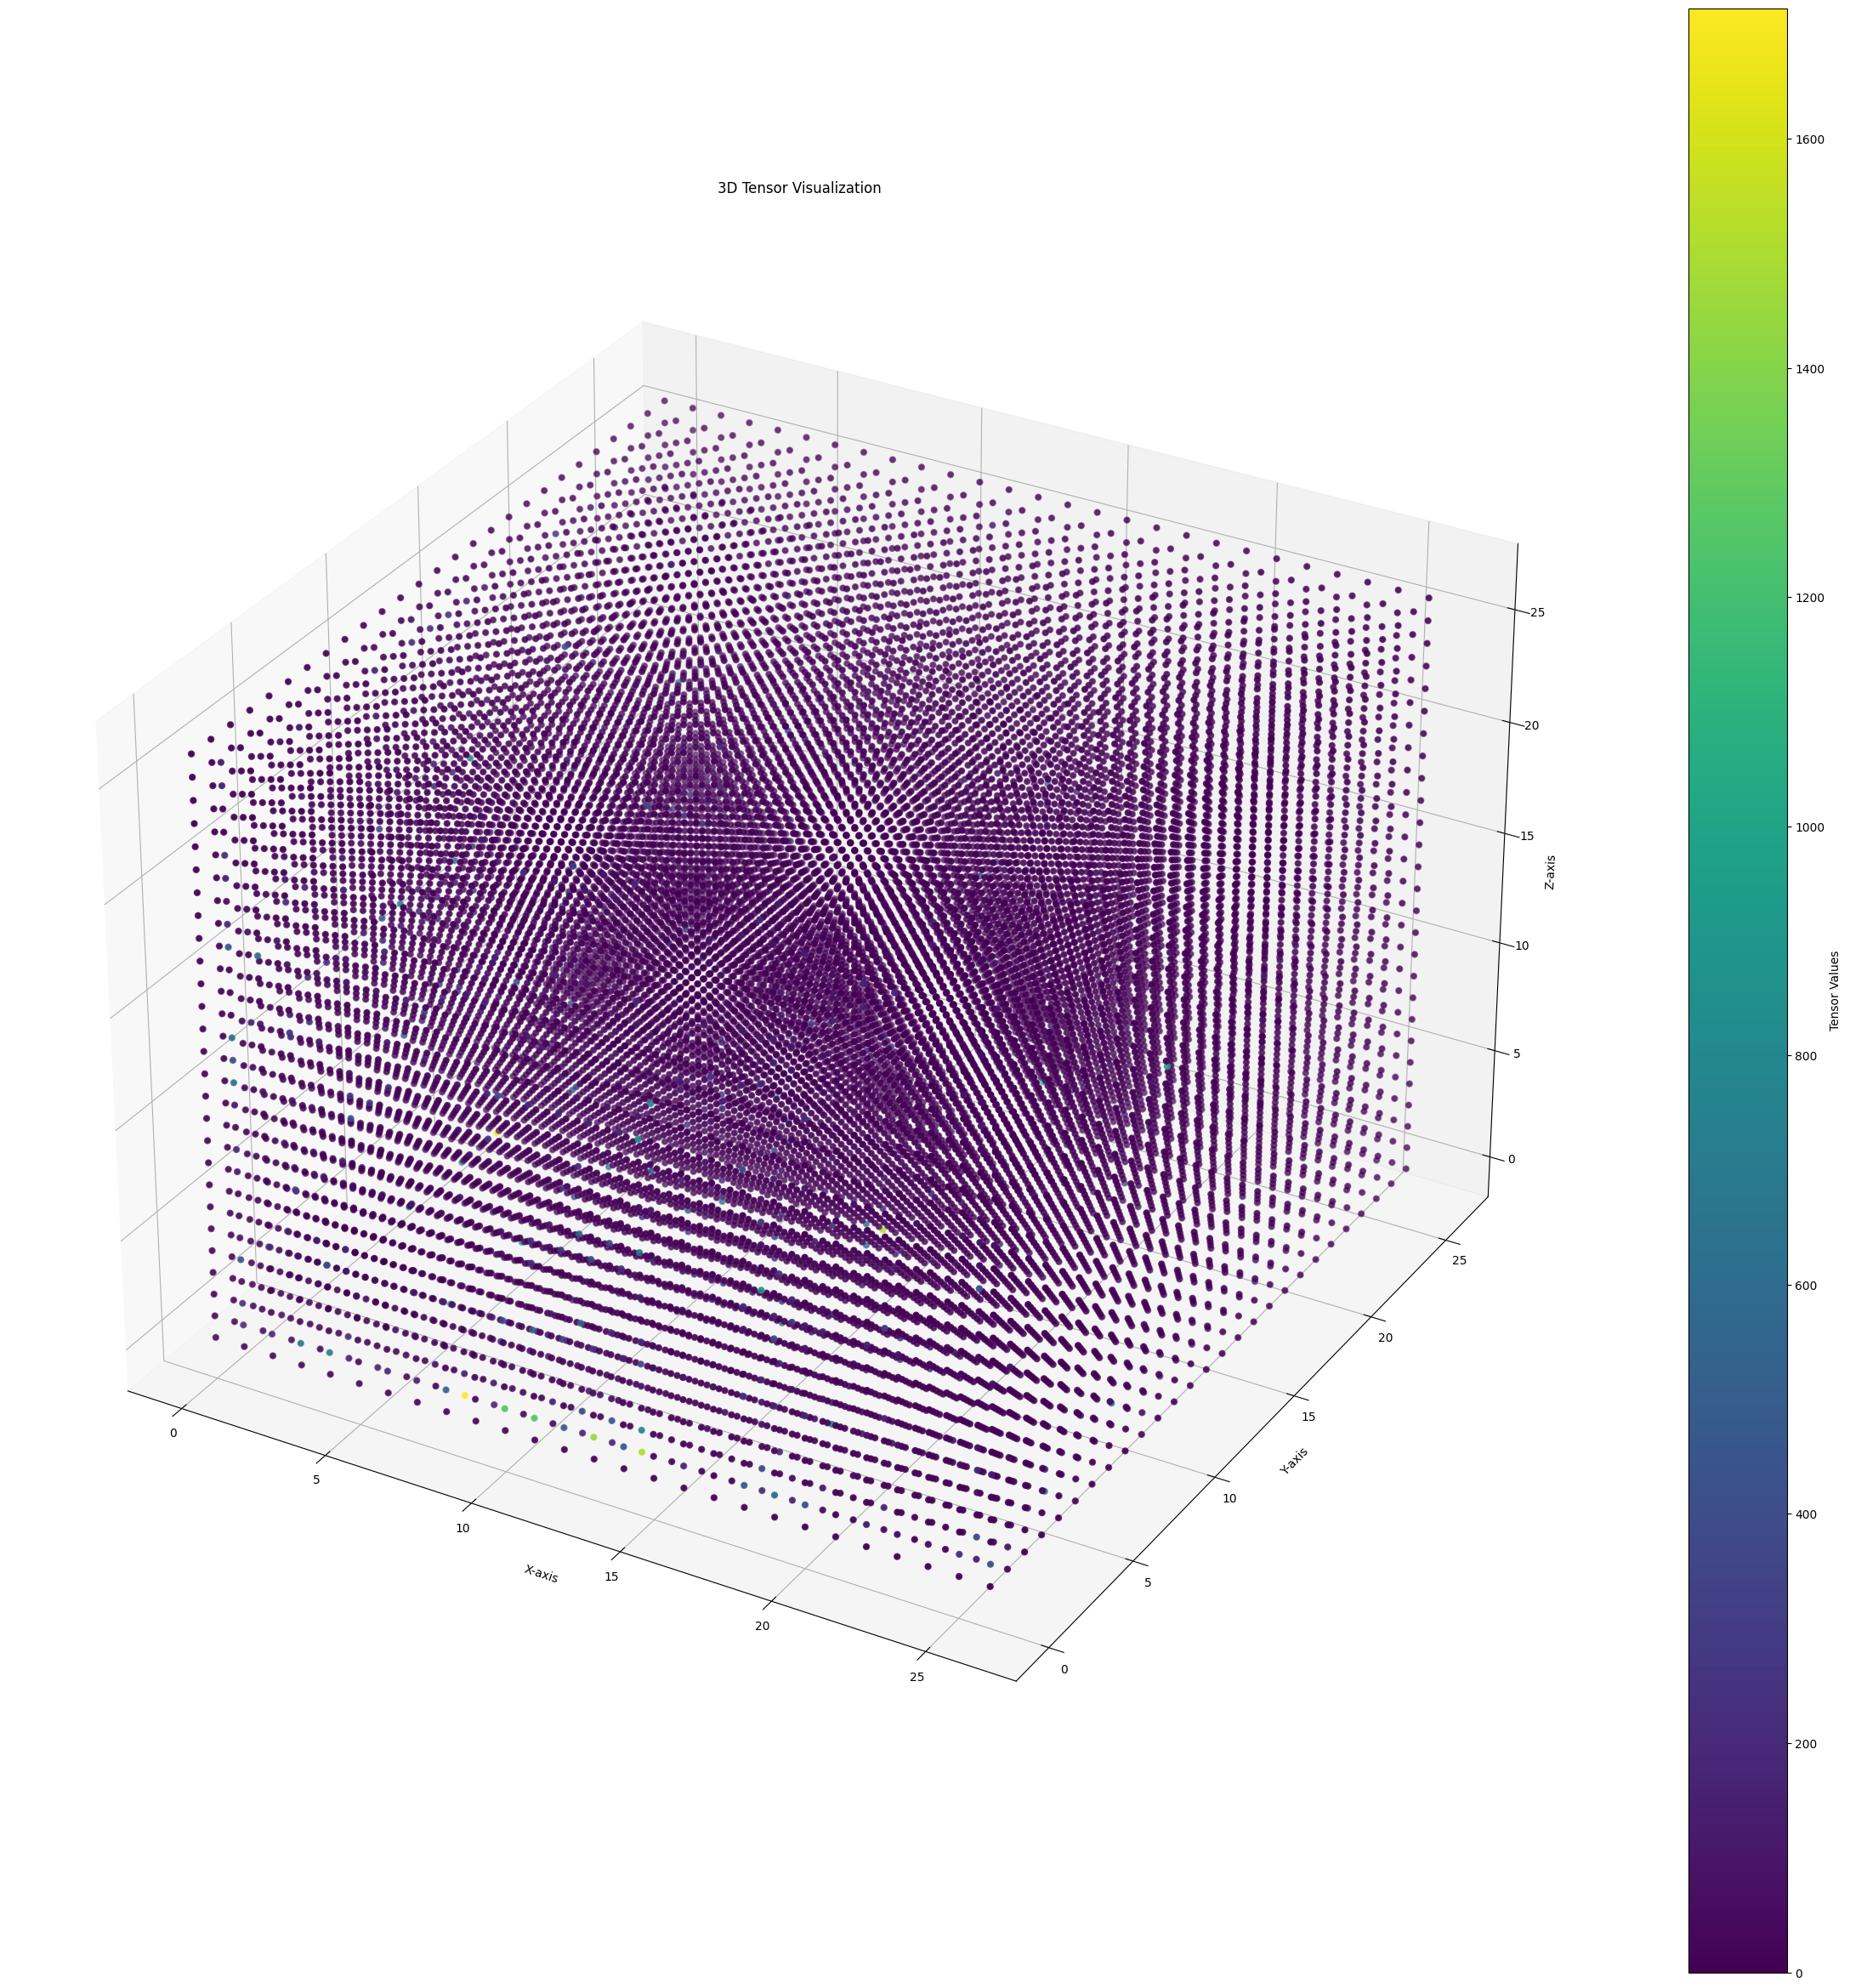

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a random 3D tensor
tensor_3d = np.random.rand(5, 5, 5)

# Get the shape of the tensor
depth, rows, cols = N.shape

# Create 3D scatter plot
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the 3D plot
x, y, z = np.meshgrid(np.arange(cols), np.arange(rows), np.arange(depth))

# Flatten the arrays
x, y, z = x.flatten(), y.flatten(), z.flatten()

# Flatten the tensor values
values = N.flatten()

# Plot the 3D scatter plot
ax.scatter(x, y, z, c=values, cmap='viridis', s=10, marker='o')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Tensor Visualization')

# Show the colorbar
cbar = plt.colorbar(ax.scatter(x, y, z, c=values, cmap='viridis', s=25, marker='o'))
cbar.set_label('Tensor Values')

# Show the plot
plt.show()


In [34]:
N[1, 0, :]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0], dtype=torch.int32)